<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/BaseBallCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
##checking null values

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
##no null values

In [10]:
## univariate analysis

In [11]:
## distplots

<Figure size 1440x864 with 0 Axes>

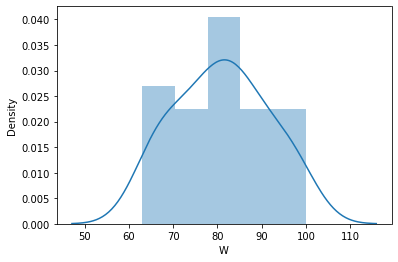

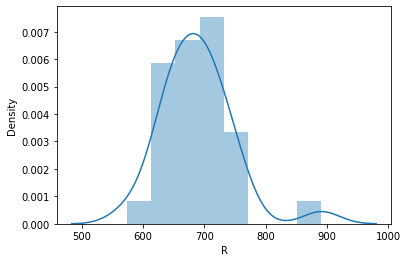

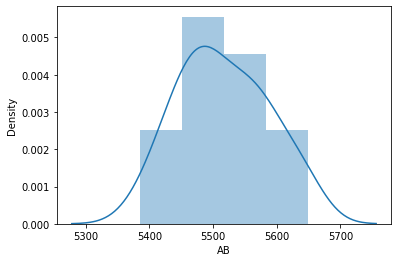

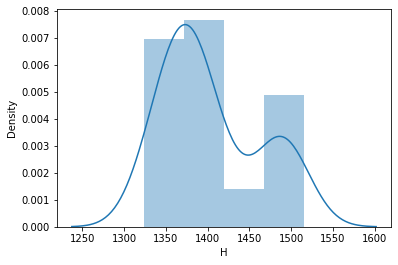

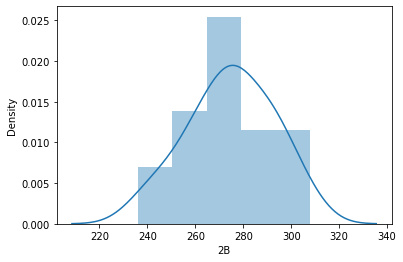

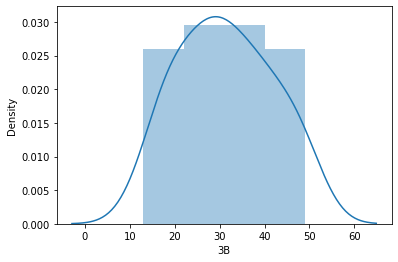

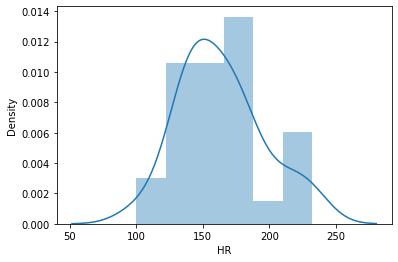

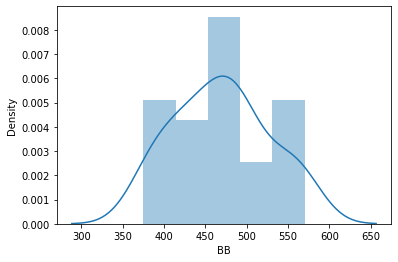

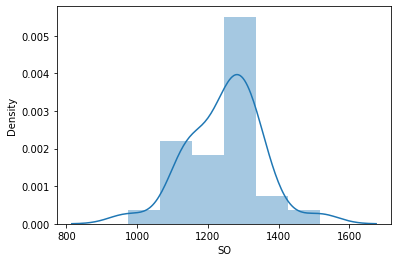

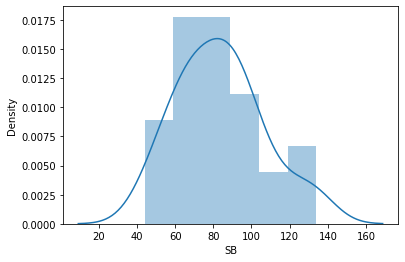

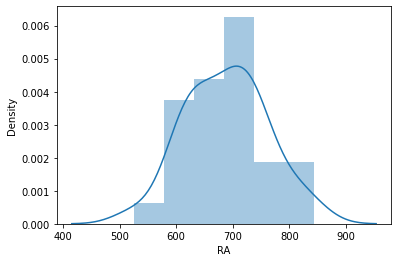

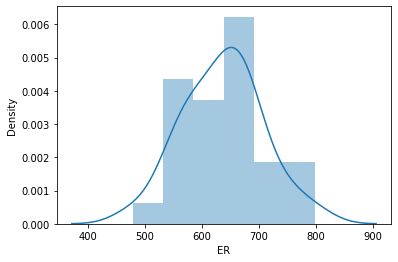

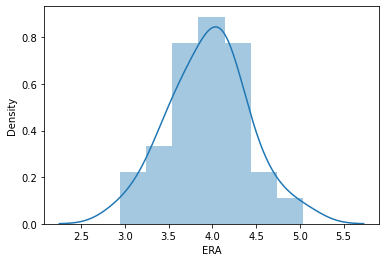

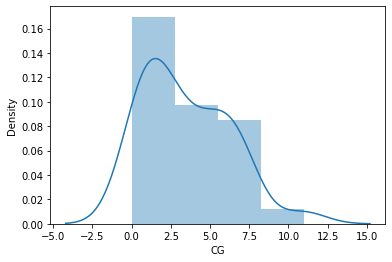

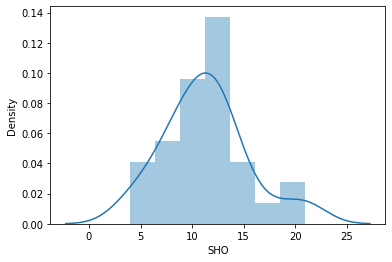

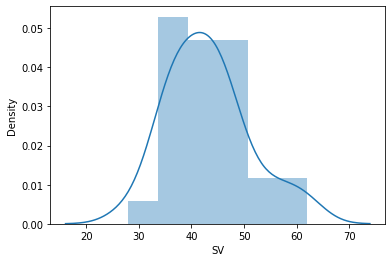

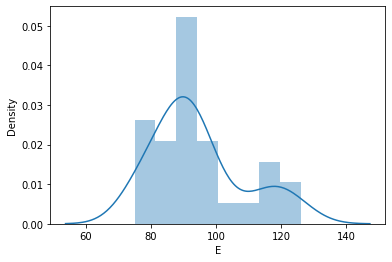

In [12]:
plt.figure(figsize=(20,12))
for i in df.columns:
  plt.subplots()
  sns.distplot(df[i])

In [13]:
##ckecking skewness 

In [14]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

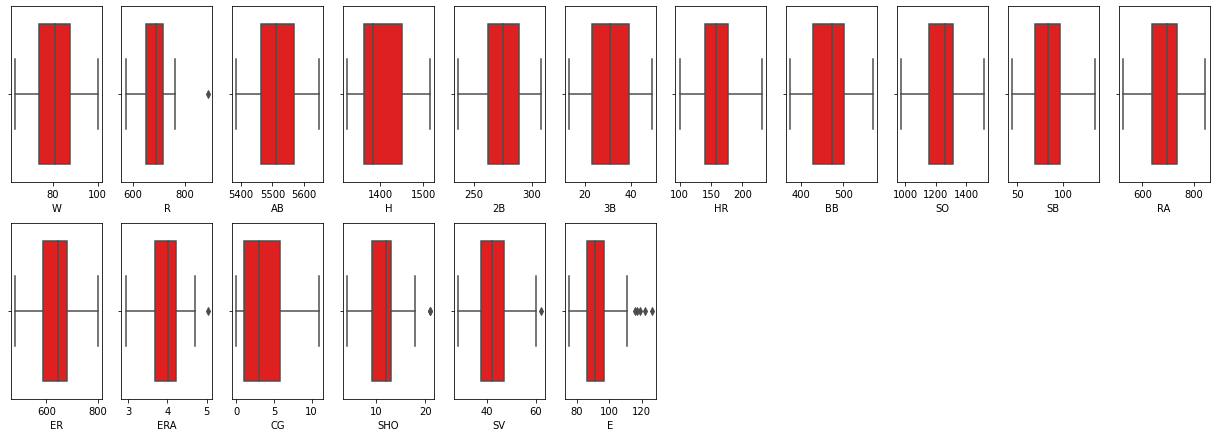

In [15]:
plt.figure(figsize=(17,51))
for i in range(len(df.columns)):
    plt.subplot(17,11,i+1)
    sns.boxplot(df[df.columns[i]], color='red', orient='v')
    plt.tight_layout()


In [16]:
##there are outliers in R,ERA,SHO,SV,E

In [17]:
##bivariate analysis

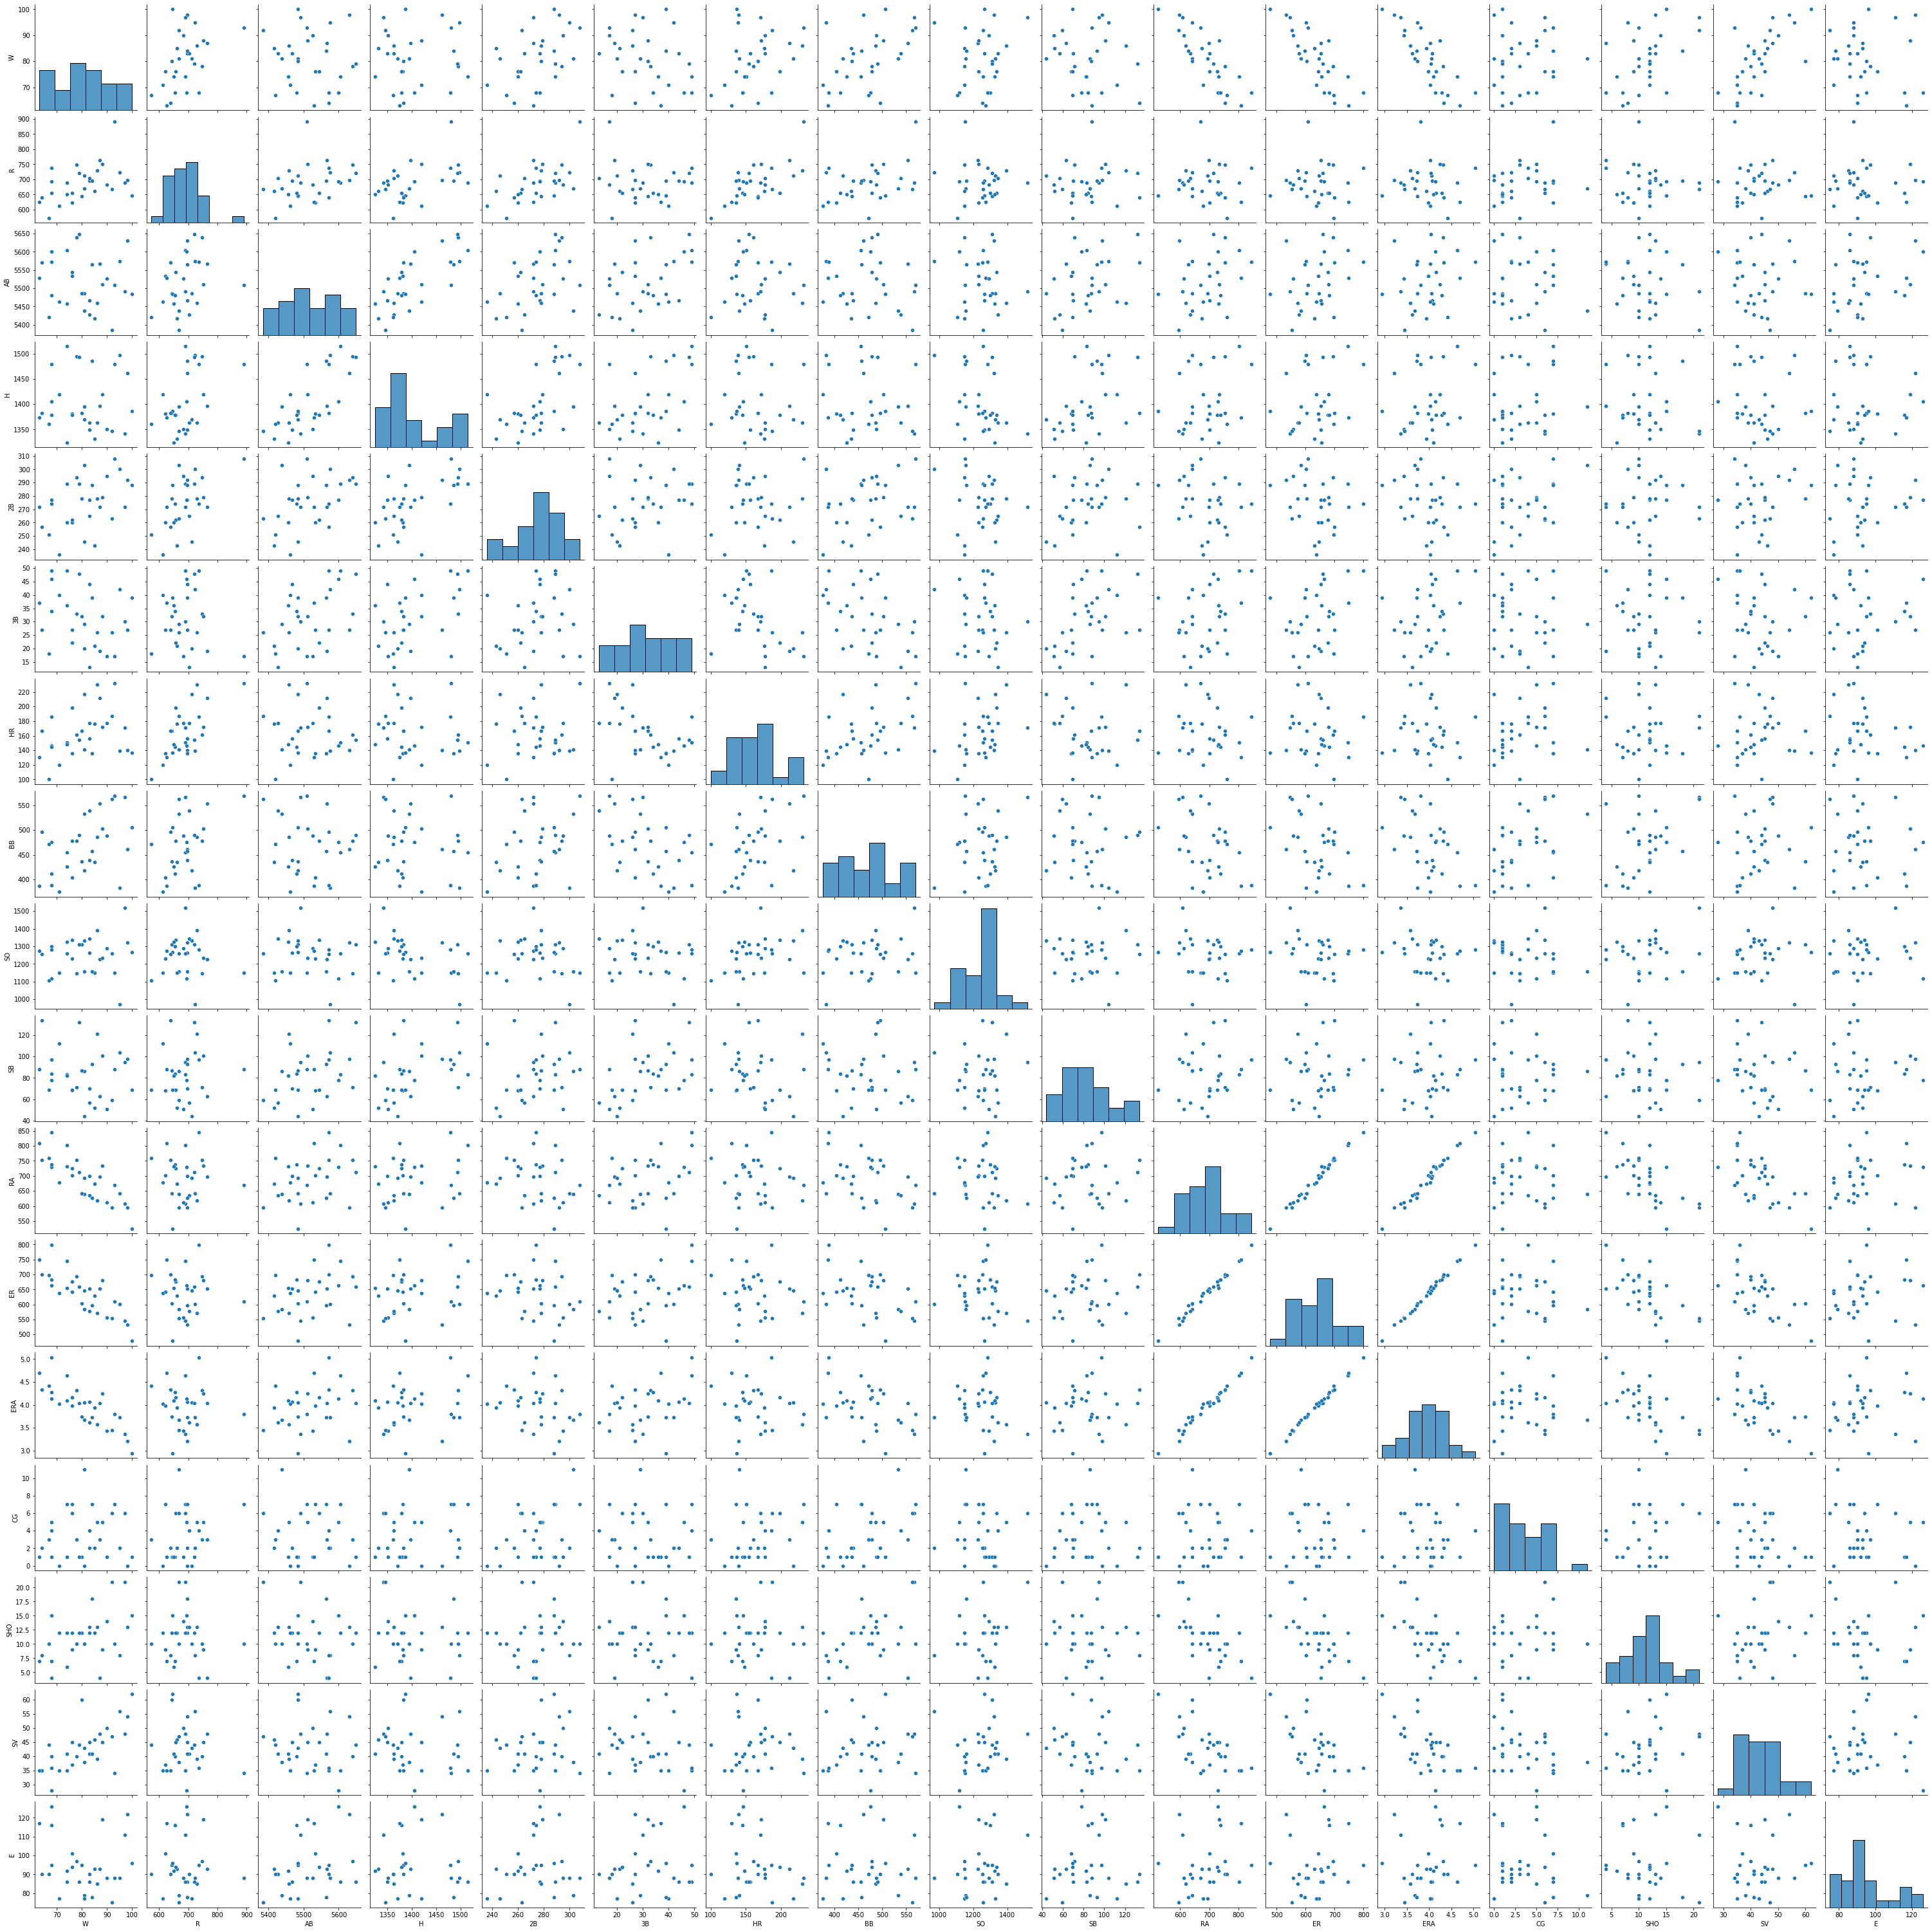

In [18]:
sns.pairplot(df)

In [19]:
##checking correlations more accurately

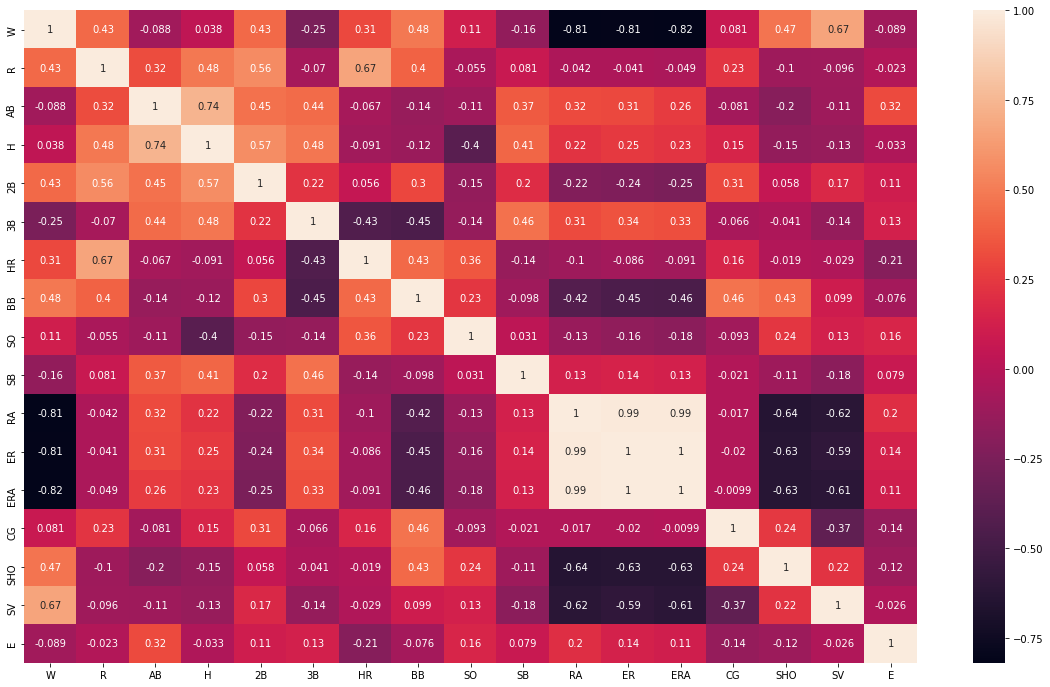

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)


In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
correlation(df,0.8)

{'ER', 'ERA', 'RA'}

In [23]:
## ER,ERA,RA are 80% correlated hence they can be drop

In [24]:
df2 = df.drop(['ER','ERA','RA'],axis=1)

In [25]:
df2.shape

(30, 14)

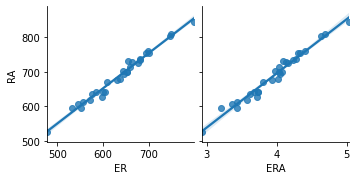

In [26]:
sns.pairplot(df,x_vars=['ER','ERA'],y_vars='RA',kind='reg') ## ER , ERA  are exactly correlated with RA hence they are dropped

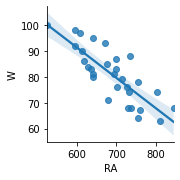

In [27]:
sns.pairplot(df,x_vars='RA',y_vars='W',kind='reg')  ## 'RA and W are 80% correlated so RA is dropped

In [28]:
## removing outliers using zscore

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
np.where(z>3)

(array([5]), array([1]))

In [30]:
## it showing only one outlier but in the boxplot there were more outliers ..using IQR method to remove them

In [31]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df_out=(df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))
df_out.sum()

W      0
R      1
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
CG     0
SHO    2
SV     1
E      5
dtype: int64

In [32]:
df2.shape

(30, 14)

In [33]:
##df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)].shape
##df2.shape

In [34]:
df2[df_out.isin([True])]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# the values of outliers in 
# E--> 119,126,122,116,117
# SV--> 62
# SHO--> 21,21
# ERA--> 5.04
# R-->891

In [36]:
df2.describe().loc[:,['SV','SHO','R']] ## we have only 4 outliers ..

,SV,SHO,R
count,30.000000,30.000000,30.000000
mean,43.066667,11.300000,688.233333
std,7.869335,4.120177,58.761754
min,28.000000,4.000000,573.000000
25%,37.250000,9.000000,651.250000
50%,42.000000,12.000000,689.000000
75%,46.750000,13.000000,718.250000
max,62.000000,21.000000,891.000000


In [37]:
# checking upper bound for every column
def upper(col):
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

In [38]:
print(upper('SV'))
print(upper('SHO'))
print(upper('R'))

61.0
19.0
818.75


In [39]:
# replacing outlier values with upper bound

In [40]:
def remove_outlier(col):
#     def upper(col):
#         Q1 = ball[col].quantile(0.25)
#         Q3 = ball[col].quantile(0.75)
#         IQR = Q3 - Q1
#         upper=Q3 + 1.5 * IQR
#         return upper
    for i in range(df2.shape[0]):
        if (df2[col].iloc[i])>upper(col):
            df2[col].iloc[i]=upper(col)

In [41]:
df2['SV'].iloc[15]

62

In [42]:
remove_outlier('SV')
remove_outlier('SHO')
remove_outlier('R')
remove_outlier('E')

In [43]:
df2.describe().loc[:,['SV','SHO','R','E']]

,SV,SHO,R,E
count,30.000000,30.000000,30.000000,30.000000
mean,43.033333,11.166667,685.825000,93.145833
std,7.788069,3.815425,51.152795,11.696507
min,28.000000,4.000000,573.000000,75.000000
25%,37.250000,9.000000,651.250000,86.000000
50%,42.000000,12.000000,689.000000,91.000000
75%,46.750000,13.000000,718.250000,96.750000
max,61.000000,19.000000,818.750000,112.875000


In [44]:
Q1N = df2.quantile(0.25)
Q3N = df2.quantile(0.75)
IQRN = Q3N - Q1N
df2_out_n=(df2 < (Q1N - 1.5 * IQRN)) | (df2 > (Q3N + 1.5 * IQRN))
df2_out_n.sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [45]:
## no outliers

In [46]:
## building the models

In [47]:
x = df2.drop('W',axis=1)
y = df2['W']

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
def get_score(m,x,y,rs=1):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

In [50]:
def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

In [51]:
def get_metrics(m,x,y,rs=1):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

In [52]:
from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_

In [53]:
from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=5,n_iter=100,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_


In [54]:
def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

In [55]:

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

In [56]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge()
ls=Lasso()
rf=RandomForestRegressor(n_jobs=-1)
xgb=XGBRegressor(n_jobs=-1)
ada=AdaBoostRegressor()

In [57]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.8919324848179816, 0.7396648664953154, 7.368339963630166)
DT  (1.0, 0.7016317016317016, 4.898979485566356)
SVR  (-0.0008045279521140536, -10901187.652096836, 10.522660884575568)
KNN  (0.3070207732829737, -7.178517787409355, 10.913981858148746)
RID  (0.8918995151701494, 0.7476026811981905, 7.1812696898431065)
LS  (0.8818967001887201, 0.8092529892877508, 5.242077289272024)
RF  (0.9032351177815324, -0.38000453050200256, 7.293236592898931)
[14:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  (0.999960260719289, 0.21347041645149267, 7.4644948524615575)


In [58]:
## lasso reg is working best

In [59]:
x2 = std(x)

In [60]:
print("LR ", get_score(lr,x2,y))
print("DT ", get_score(dt,x2,y))
print("SVR ", get_score(svr,x2,y))
print("KNN ", get_score(knn,x2,y))
print("RID ", get_score(rid,x2,y))
print("LS ", get_score(ls,x2,y))
print("RF ", get_score(rf,x2,y))
print("XGB ", get_score(xgb,x2,y))

LR  (0.8919324848179814, 0.7396648664953138, 7.36833996363017)
DT  (1.0, 0.3105369023673217, 8.344159634139318)
SVR  (0.17263579896047154, -137.19424518663627, 10.021324053924994)
KNN  (0.5561952092237351, -0.35583424411388864, 6.763505008499663)
RID  (0.8687484210713533, 0.7332302258940533, 5.227931818054918)
LS  (0.7911461447477397, 0.6221979699353308, 4.85097141721313)
RF  (0.8789028685021371, -0.6173241442677797, 7.1815005395808456)
[14:07:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  (0.999960260719289, 0.21347041645149267, 7.4644948524615575)


In [66]:
## lr, ridge and lasso is working fine

In [82]:
import joblib
joblib.dump(ls,'baseball.pkl')

['baseball.pkl']